**Problema general**: En Colombia la pobreza ha sido una situación con la que hemos venido luchando desde hace ya mucho tiempo. Con la llegada de la pandemia por Covid-19 y sus efectos en la economía nacional, este fenómeno no ha hecho más que crecer, situando la población pobre en 42.5% y la vulnerable en 30.4% a finales de 2020 según cifras del DANE (https://forbes.co/2021/05/06/economia-y-finanzas/personas-con-ingresos-entre-653-781-y-35-millones-al-mes-son-clase-media/). 
 
Es por esto que problemas como la optimización de la dieta pueden ser muy útiles en el entorno colombiano, no solo para poder dar guías alimentarias a las familias que puedan ayudarles a llevar dietas lo más completas posibles usando el menor presupuesto, sino también para que el gobierno pueda aprovechar mejor sus recursos a la hora de dar planes alimentarios, posiblemente permitiendo expandir la cobertura a una mayor población.
 
Sin embargo, el costo de una dieta puede variar mucho entre determinadas ciudades, lo que hace más complicado poder dar una gran cobertura a lo largo del territorio nacional. Es por esto que se puede usar optimización estocástica, que tome en cuenta esta varianza, para poder encontrar un menú que sea lo más generalizable posible.




**Motivación**: Una solución regular al problema de la dieta (buscar una dieta optima que tenga todos los requerimientos nutricionales por el menor precio) generalmente toma valores únicos para cada alimento. Esto es poco realista si se desea utilizar a gran escala debido a la variabilidad que presentan los precios de alimentos determinados debido a diferentes factores, como por ejemplo la ubicación (Un alimento generalmente no va a costar lo mismo en dos ciudades distintas, e incluso ni siquiera en dos proveedores en la misma ciudad)
 
Al no tomar en cuenta esto, las soluciones pueden encontrarse restringidas a un proveedor en específico, lo cual limita su aplicabilidad en la población general, que puede no tener acceso a estos precios.
Si se usa programación cuadrática, podemos tomar en cuenta esta variación de tal forma que intentemos minimizarla, pudiendo ofrecer una solución con gran cobertura y sabiendo que las personas en distintas partes del país no tendrán que desviarse mucho del presupuesto planteado para poder acceder a la dieta planteada.
 
Como ejemplo, durante la recolección de datos se encontró que la arveja reportaba precios mucho más altos en Barranquilla que en el resto del país, variando desde \$3,3680  por gramo en Medellín hasta más del doble, \$7,3880 pesos por gramo en Barranquilla. Esto hace que una dieta que dependa mucho de esta legumbre sea poco viable. Esto no es del todo imposible, ya que la arveja tiene un alto contenido en carbohidratos y proteína, haciéndola un gran alimento para suplir estos nutrientes.






In [1]:
from IPython.display import Image, display

Función objetivo: $\bar{c}^T x + \gamma x^T \Sigma x$ = $Ec x + \gamma x^{T} var(c)x$

La función representa el costo promedio de una dieta determinada $\bar{c}^T x$, a lo cual se le suma la posible varianza en costo que pueda tener esta dieta $x^T \Sigma x$, multiplicada por un factor $\gamma$ de aversión al riesgo.

Donde:


*   $\bar{c}$ es un vector que representa el costo promedio de los alimentos que se toman en cuenta para el problema
*   $x$ es un vector que representa la cantidad de cada alimento determinado, y es la variable sobre la que se va a trabajar
*  $\Sigma$ es un vector que representa la varianza en el costo de cada alimento

*  $\gamma$ es un valor real entre 0 y 1 que representa una aversión al riesgo. Valores bajos de gamma dan como resultado que incentive dietas con un valor promedio más bajo, mientras valores mayores castigan dietas que tengan grandes varianzas en los costos de los alimentos

El factor más importante para nuestro estudio es $\gamma$, el cual representa un factor de aversión al riesgo. Nuestro objetivo es obtener una dieta que tenga un valor de gamma alto, de tal forma que la varianza tenga un gran peso en el costo de la dieta y podamos asegurarnos de que estamos buscando una que tenga unos precios estables a lo largo de los proveedores investigados. 
De esta forma, conseguiremos que nuestra dieta pueda ser conseguida por aproximadamente el mismo precio en las distintas ciudades del país, que generalmente actúan como proveedores para los planes de alimentación del gobierno.



Restricciones: Siguiendo los valores recomendados por la OMS (https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) y la FDA de EEUU (https://www.fda.gov/media/137914/download), se pueden marcar las siguientes restricciones:


* Ingesta calórica $\leq$ 2250 Kcal
* Ingesta calórica $\geq$ 1750 Kcal
* Carbohidratos: $\leq$ 325 g
* Carbohidratos: $\geq$ 275 g
* Proteína: $\leq$ 98,41 g
* Proteína: $\geq$ 50 g
* Grasas totales: $\leq$ 78 g
* Grasas totales: $\geq$ 66 g
* Calcio: $\leq$ 2,5 g
* Calcio: $\geq$ 1,3 g

Otras como:

* Cantidad total de alimento: $\leq$ 1500 g

Y también, la restricción más importante:
 * costo $\leq$ 10.393 COP


Para la dieta, se usarán algunos de los productos de la llamada **Canasta Básica** (CBF), una medida del gobierno para tener un valor para los alimentos más consumidos a lo largo del país, y se consideran productos vitales de primera necesidad (https://www.misfinanzasparaminegocio.com/productos-de-la-canasta-familiar/) tomando en cuenta hábitos de consumo para, por ejemplo, eximirlos de IVA, haciéndolos más asequibles al público.



Entre estos, los que seleccionamos para el modelo fueron:


*   Cebolla Cabezona
* Tomate
* Frijol
* Arroz
* Huevo (AA)
* Lomo (Res)
* Lomo (Cerdo)
* Pechuga (Pollo)
* Papa
* Lenteja
* Arveja
* Pasta
* Queso
* Zanahoria


Entre los valores a estudiar, decidimos usar calorías, carbohidratos, proteína, grasa y calcio. La ingesta calórica es la medición más básica, pues es la medición de la energía consumida, y sobre la cual se dan otras mediciones, como por ejemplo carbohidratos y proteína, que se dan en porcentajes de la ingesta calórica diaria. 

Los datos de los precios de estos alimentos fueron tomados del precio promedio por ciudad en cuatro de las principales ciudades del país (Barranquilla, Bogotá, Cali y Medellín) 

Los datos se obtuvieron de:


*   Que productos forman la CBA: https://www.misfinanzasparaminegocio.com/productos-de-la-canasta-familiar/
*   Precio de los alimentos por ciudad: https://www.dane.gov.co/index.php/estadisticas-por-tema/precios-y-costos
* Valores diarios recomendados: https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet, https://www.fda.gov/media/137914/download
* Valores nutricionales de los distintos alimentos: https://www.yazio.com/es/alimentos, https://5aldia.cl/, https://www.fatsecret.com.mx/calor%C3%ADas-nutrici%C3%B3n/ y https://www.vegaffinity.com/comunidad/alimento/



# Datos csv

In [ ]:
!pip install pulp
!pip install cvxpy
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import cvxpy as cp
import numpy as np
import plotly.express as px
from pulp import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:

f=pd.read_csv('https://raw.githubusercontent.com/drodriguezol/Optimizacion-Proyecto/main/Copia%20de%20Datos%20Opti%20-%20Hoja%201.csv') 
f

,Alimento,CostoBogota/g,CostoBarranquilla/g,CostoMedellin/g,CostoCali/g,promedio,varianza,kcal/g,carb/g,proteina/g,grasa/g,calcio/g
0,Cebolla Cabezona,1.70000,2.05550,1.91550,1.76350,1.85862,0.02540,0.40000,0.09300,0.01100,0.00100,0.00023
1,Tomate,2.74500,2.74800,3.10250,3.25150,2.96200,0.06548,0.18000,0.02700,0.00900,0.00200,0.00010
2,Frijol,8.13730,7.26750,9.51550,6.10630,7.75665,2.06712,1.51000,0.21390,0.05540,0.05150,0.00130
3,Arroz,2.61025,2.69300,2.44500,2.49600,2.56106,0.01251,1.29000,0.27900,0.02660,0.00280,0.00010
4,Huevo (AA),6.65380,8.46150,6.53080,6.80760,7.11343,0.82051,1.07690,0.01530,0.12300,0.07690,0.00050
5,Lomo (Res),33.75100,28.45800,48.00000,29.68880,35.04320,82.92826,1.27000,0.00000,0.22270,0.03540,0.00019
6,Lomo (Cerdo),18.98100,14.05800,21.35000,20.75100,18.78500,10.94244,1.20000,0.00000,0.20990,0.03410,0.00019
7,Pechuga (Pollo),12.36700,12.85000,13.75000,12.25000,12.80430,0.46497,1.17000,0.00000,0.21800,0.03330,0.00015
8,Papa,2.64600,2.32500,3.62500,2.65100,2.81175,0.31720,1.04000,0.19360,0.01660,0.02400,0.00012
9,Lenteja,6.05375,5.52700,5.52750,5.52900,5.65931,0.06915,3.25000,0.54000,0.25000,0.01700,0.00019


PuLP es una librería de Python utilizada para modelar y resolver problemas de optimización mediante programación lineal, lo cual incluye soporte para problemas de maximización y minimización con restricciones. Está disponible bajo una licencia de código abierto (open source), lo que fomenta y facilita su uso dentro de otros proyectos que necesiten capacidades de optimización lineal.

In [ ]:
#Formulamos el problema de programación lineal en cada ciudad para minimizar el costo dependiendo de unos requerimientos
def MinimizarCosto(Ciudadstr): #Función para minimizar costo de la dieta en cada ciudad
     Ciudad=LpProblem("ProblemaDieta",LpMinimize)
     Alimentos = list(f['Alimento'])
     Costo = dict(zip(Alimentos,f['Costo'+ Ciudadstr+'/g']))
     calorias = dict(zip(Alimentos,f['kcal/g']))
     carbohidratos=dict(zip(Alimentos,f['carb/g']))
     proteina=dict(zip(Alimentos,f['proteina/g']))
     grasa=dict(zip(Alimentos,f['grasa/g']))
     calcio=dict(zip(Alimentos,f['calcio/g']))
     alimentos_vars = LpVariable.dicts("Alimentos",Alimentos,0,cat='Integer')
     Ciudad += lpSum([Costo[i]*alimentos_vars[i] for i in Alimentos]), "Costo total de la dieta"
     Ciudad += lpSum([calorias[f] * alimentos_vars[f] for f in Alimentos]) >= 1750.0, "MínimoCalorías"
     Ciudad += lpSum([calorias[f] * alimentos_vars[f] for f in Alimentos]) <= 2250.0, "MáximoCalorías"
     Ciudad += lpSum([proteina[f] * alimentos_vars[f] for f in Alimentos]) >= 50, "MínimoProteinas"
     Ciudad += lpSum([proteina[f] * alimentos_vars[f] for f in Alimentos]) <= 98.41, "MáximoProteinas"
     Ciudad += lpSum([carbohidratos[f] * alimentos_vars[f] for f in Alimentos]) >= 275, "Mínimo de Carbohidratos"
     Ciudad += lpSum([carbohidratos[f] * alimentos_vars[f] for f in Alimentos]) <= 325, "Máximo de Carbohidratos"
     Ciudad += lpSum([grasa[f] * alimentos_vars[f] for f in Alimentos]) >= 66, "Mínimo de Grasas"
     Ciudad += lpSum([grasa[f] * alimentos_vars[f] for f in Alimentos]) <= 78, "Máximo de Grasas"
     Ciudad += lpSum([calcio[f] * alimentos_vars[f] for f in Alimentos]) >= 1.3 , "Mínimo de Calcio"
     Ciudad += lpSum([calcio[f] * alimentos_vars[f] for f in Alimentos]) <= 2.5 , "Máximo de Calcio"
     Ciudad += lpSum(sum([alimentos_vars[f] for f in Alimentos])) <= 1500 , "Máxima cantidad de Alimento"
     Ciudad.writeLP("SimpleDietProblem.lp")
     print(Ciudad)
     Ciudad.solve()
     print("Status:", LpStatus[Ciudad.status])
     for v in Ciudad.variables():
        if v.varValue>0:
           print(v.name, "=", v.varValue)
     costo=(round(value(Ciudad.objective),2))
     print("Costo de la dieta minimizada en "+ Ciudadstr +" es de${}".format(round(value(Ciudad.objective),2)))
     return Ciudad,costo


# Mimizando Costo de Dieta en Bogotá:

In [ ]:
Bogota=MinimizarCosto("Bogota")

ProblemaDieta:
MINIMIZE
2.61025*Alimentos_Arroz + 4.235*Alimentos_Arveja + 1.7*Alimentos_Cebolla_Cabezona + 8.1373*Alimentos_Frijol + 6.6538*Alimentos_Huevo_(AA) + 6.05375*Alimentos_Lenteja + 18.981*Alimentos_Lomo_(Cerdo) + 33.751*Alimentos_Lomo_(Res) + 2.646*Alimentos_Papa + 6.212*Alimentos_Pasta + 12.367*Alimentos_Pechuga_(Pollo) + 13.836*Alimentos_Queso + 2.745*Alimentos_Tomate + 1.98*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja
 + 1.2 Alimentos_Lomo_(Cerdo) + 1.27 Alimentos_Lomo_(Res)
 + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta + 1.17 Alimentos_Pechuga_(Pollo)
 + 1.45 Alimentos_Queso + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria
 >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja


# Minimizando costo de dieta en Medellín

In [ ]:
Medellin=MinimizarCosto("Medellin")

ProblemaDieta:
MINIMIZE
2.445*Alimentos_Arroz + 3.368*Alimentos_Arveja + 1.9155*Alimentos_Cebolla_Cabezona + 9.5155*Alimentos_Frijol + 6.5308*Alimentos_Huevo_(AA) + 5.5275*Alimentos_Lenteja + 21.35*Alimentos_Lomo_(Cerdo) + 48.0*Alimentos_Lomo_(Res) + 3.625*Alimentos_Papa + 6.231*Alimentos_Pasta + 13.75*Alimentos_Pechuga_(Pollo) + 17.515*Alimentos_Queso + 3.1025*Alimentos_Tomate + 0.8375*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja
 + 1.2 Alimentos_Lomo_(Cerdo) + 1.27 Alimentos_Lomo_(Res)
 + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta + 1.17 Alimentos_Pechuga_(Pollo)
 + 1.45 Alimentos_Queso + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria
 >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja
 

# Minimizando Costo de la dieta en Barranquilla

In [ ]:
Barranquilla=MinimizarCosto("Barranquilla")

ProblemaDieta:
MINIMIZE
2.693*Alimentos_Arroz + 7.388*Alimentos_Arveja + 2.0555*Alimentos_Cebolla_Cabezona + 7.2675*Alimentos_Frijol + 8.4615*Alimentos_Huevo_(AA) + 5.527*Alimentos_Lenteja + 14.058*Alimentos_Lomo_(Cerdo) + 28.458*Alimentos_Lomo_(Res) + 2.325*Alimentos_Papa + 5.834*Alimentos_Pasta + 12.85*Alimentos_Pechuga_(Pollo) + 18.863*Alimentos_Queso + 2.748*Alimentos_Tomate + 1.706*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja
 + 1.2 Alimentos_Lomo_(Cerdo) + 1.27 Alimentos_Lomo_(Res)
 + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta + 1.17 Alimentos_Pechuga_(Pollo)
 + 1.45 Alimentos_Queso + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria
 >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja
 

# Minimizando Costo de la dieta en Cali

In [ ]:
Cali=MinimizarCosto("Cali")

ProblemaDieta:
MINIMIZE
2.496*Alimentos_Arroz + 3.786*Alimentos_Arveja + 1.7635*Alimentos_Cebolla_Cabezona + 6.1063*Alimentos_Frijol + 6.8076*Alimentos_Huevo_(AA) + 5.529*Alimentos_Lenteja + 20.751*Alimentos_Lomo_(Cerdo) + 29.6888*Alimentos_Lomo_(Res) + 2.651*Alimentos_Papa + 6.695*Alimentos_Pasta + 12.25*Alimentos_Pechuga_(Pollo) + 16.152*Alimentos_Queso + 3.2515*Alimentos_Tomate + 0.82*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja
 + 1.2 Alimentos_Lomo_(Cerdo) + 1.27 Alimentos_Lomo_(Res)
 + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta + 1.17 Alimentos_Pechuga_(Pollo)
 + 1.45 Alimentos_Queso + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria
 >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 0.4 Alimentos_Cebolla_Cabezona + 1.51 Alimentos_Frijol
 + 1.0769 Alimentos_Huevo_(AA) + 3.25 Alimentos_Lenteja


# Resultados Generales del primer experimento con las restricciones iniciales dadas

Los resultados obtenidos que restringen tanto cantidad de nutrientes, precio y peso no están alejados de la realidad ya que perfectamente se puede hacer una dieta con los resultados dados, el problema es que las cantidades de alimentos en algunas ciudades son exageradas, como por ejemplo en Cali tendríamos una dieta en la que tocaría consumir casi 1kg de frijol al día y por otro lado consumir solo 1g de zanahoria al día. Aunque las dietas cumplan con los mínimos nutrientes y tengan un precio adecuado, no son dietas atractivas.

Los resultados de los precios minimizados por cada ciudad nos demuestran que, aunque las dietas sean parecidas, puede llegar a haber una gran variabilidad de precio de una ciudad a otra por lo que nuestra motivación inicial se mantiene.


In [ ]:
RP=[Bogota,Medellin,Barranquilla,Cali]
n=["Bogotá: $"+str(RP[0][1]),"Medellin: $"+str(RP[1][1]),"Barranquilla: $"+str(RP[2][1]),"Cali: $"+str(RP[3][1])]
gramos=[]
alimentos=[]
fig = make_subplots(1, 4, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'},{'type':'domain'}]],
                    subplot_titles=n)
for j in range(0,len(RP)):
    #print(n[j])
    for v in RP[j][0].variables():
            if v.varValue>0:
              gramos.append(v.varValue)
              alimentos.append(v.name)
              fig.add_trace(go.Pie(labels=alimentos, values=gramos, scalegroup='one',
                     name="Dieta"+n[j]), 1, j+1)
              #print(v.name, "=", v.varValue)
    gramos=[]
    alimentos=[]

fig.update_layout(title_text='Dieta en distintas ciudades')
fig.show(renderer="colab")

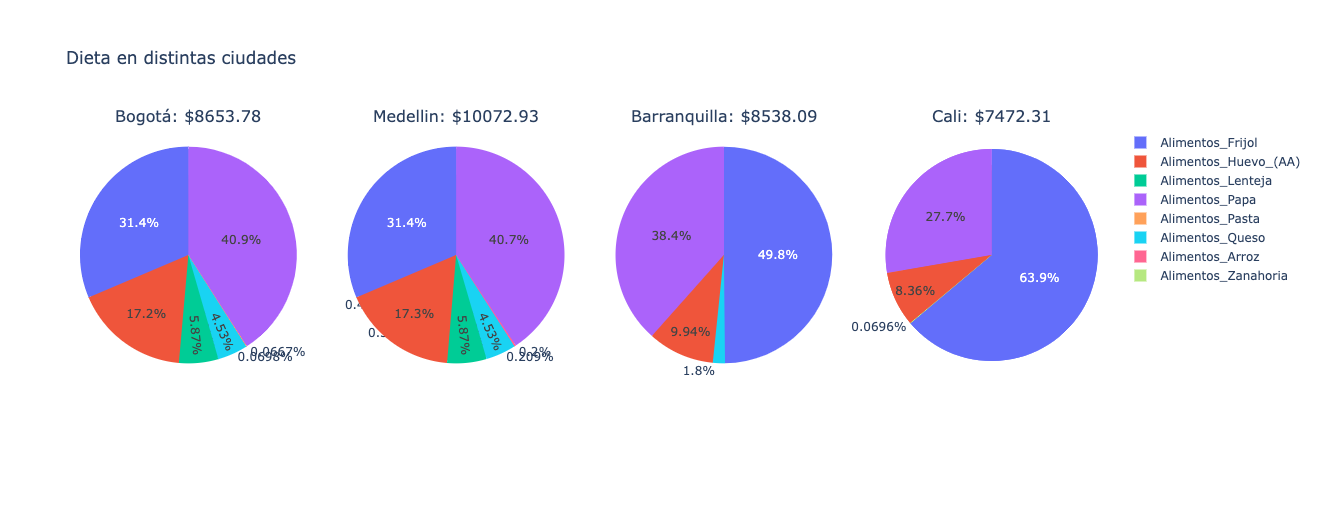

In [2]:
display(Image('1.png'))

Durante el primer experimento, y como datos de control, decidimos realizar el problema linealmente de ciudad en ciudad, permitiéndonos hacernos una idea del panorama.
Durante la primera tanda, nos dimos cuenta que las dietas sí cambiaban de ciudad en ciudad, lo que va de acuerdo con nuestra hipótesis. En general, se tenía que uno o dos alimentos tenían una gran influencia en la dieta, que algunos alimentos no eran considerados en más de una ciudad y que, aun así, el valor de la dieta no era tan similar entre ciudades. En esta primera tanda de experimentos, algunas dietas requerían más de 4kg de zanahoria por día, lo cual se nos hacía poco realista. 

Con más experimentación y ajustando las restricciones, nuestro experimento empezó a darnos otros resultados. Aún había alimentos que tenían gran influencia y acaparaban la mayoría de la dieta, pero por lo menos las dietas eran similares entre sí hasta cierto punto. Lo que no fue similar fue el precio, variando desde aproximadamente \$7400 en Cali hasta aproximadamente \$10000 en Medellín. Una diferencia de \$2600, recordemos, por persona por día. Si tenemos dos familias de cuatro integrantes cada una, en Medellín y Cali, a lo largo de un mes de 30 días, la familia de Medellín va a haber gastado \$312000 más que la de Medellín.


In [ ]:
#Actualizar datos
f = pd.read_csv('https://raw.githubusercontent.com/rpenal/IntroOptimizacion/main/Proyecto/data/datosAlimentos.csv') 
cols = f.columns.drop('Alimento')
f[cols] = f[cols].replace(',','.',regex=True)
f[cols] = f[cols].apply(pd.to_numeric)
f

,Alimento,CostoBogota/g,CostoMedellin/g,CostoBarranquilla/g,CostoCali/g,promedio,varianza,kcal/g,carb/g,proteina/g,grasa/g,calcio/g,mghierro/g,B12/g
0,Cebolla Cabezona,1.70000,1.91550,2.05550,1.76350,1.85862,0.02540,0.40000,0.09300,0.01100,0.00100,0.00023,0.00200,0.00000
1,Tomate,2.74500,3.10250,2.74800,3.25150,2.96200,0.06548,0.18000,0.02700,0.00900,0.00200,0.00010,0.00300,0.00000
2,Frijol,8.13730,9.51550,7.26750,6.10630,7.75665,2.06712,1.51000,0.21390,0.05540,0.05150,0.00130,0.05100,0.00000
3,Arroz,2.61025,2.44500,2.69300,2.49600,2.56106,0.01251,1.29000,0.27900,0.02660,0.00280,0.00010,0.00200,0.00000
4,Huevo (AA),6.65380,6.53080,8.46150,6.80760,7.11343,0.82051,1.07690,0.01530,0.12300,0.07690,0.00050,0.01200,0.00000
5,Lomo (Res),33.75100,48.00000,28.45800,29.68880,35.04320,82.92826,1.27000,0.00000,0.22270,0.03540,0.00019,0.01900,0.00000
6,Lomo (Cerdo),18.98100,21.35000,14.05800,20.75100,18.78500,10.94244,1.20000,0.00000,0.20990,0.03410,0.00019,0.00900,0.00000
7,Pechuga (Pollo),12.36700,13.75000,12.85000,12.25000,12.80430,0.46497,1.17000,0.00000,0.21800,0.03330,0.00015,0.01000,0.00000
8,Papa,2.64600,3.62500,2.32500,2.65100,2.81175,0.31720,1.04000,0.19360,0.01660,0.02400,0.00012,0.00500,0.00000
9,Lenteja,6.05375,5.52750,5.52700,5.52900,5.65931,0.06915,3.25000,0.54000,0.25000,0.01700,0.00019,0.03300,0.00000


Para la segunda versión, se consideró agregar nutrientes como la vitamina B12 y el hierro, presentes principalmente en carnes y deficientes en la mayoría de la población; además, agregamos un alimento extra, barato y de muy consumido: el atún, una gran fuente de hierro y vitamina B12

También, para evitar que un solo alimento monopolizara la dieta, se agregó la restricción de: cantidad_de_alimento $\leq$ 500g


Nuevas restricciones a tomar en cuenta

*   Cantidad mínima de hierro: > 12 mg
*   Cantidad máxima de hierro: < 14 mg
*   Cantidad mínima de vitamina B12: > 2.45 $\mu$g
*   Cantidad mínima de vitamina B12: < 2.65 $\mu$g



In [ ]:
def MinimizarCostoV2(Ciudadstr): #Función para minimizar costo de la dieta en cada ciudad
     Ciudad=LpProblem("ProblemaDieta",LpMinimize)
     Alimentos = list(f['Alimento'])
     Costo = dict(zip(Alimentos,f['Costo'+ Ciudadstr+'/g']))
     calorias = dict(zip(Alimentos,f['kcal/g']))
     carbohidratos=dict(zip(Alimentos,f['carb/g']))
     proteina=dict(zip(Alimentos,f['proteina/g']))
     grasa=dict(zip(Alimentos,f['grasa/g']))
     calcio=dict(zip(Alimentos,f['calcio/g']))
     hierro=dict(zip(Alimentos,f['mghierro/g']))
     B12=dict(zip(Alimentos,f['B12/g']))
     alimentos_vars = LpVariable.dicts("Alimentos",Alimentos,0,500,cat='Integer')
     Ciudad += lpSum([Costo[i]*alimentos_vars[i] for i in Alimentos]), "Costo total de la dieta"
     Ciudad += lpSum([calorias[f] * alimentos_vars[f] for f in Alimentos]) >= 1750.0, "MínimoCalorías"
     Ciudad += lpSum([calorias[f] * alimentos_vars[f] for f in Alimentos]) <= 2250.0, "MáximoCalorías"
     Ciudad += lpSum([proteina[f] * alimentos_vars[f] for f in Alimentos]) >= 50, "MínimoProteinas"
     Ciudad += lpSum([proteina[f] * alimentos_vars[f] for f in Alimentos]) <= 98.41, "MáximoProteinas"
     Ciudad += lpSum([carbohidratos[f] * alimentos_vars[f] for f in Alimentos]) >= 275, "Mínimo de Carbohidratos"
     Ciudad += lpSum([carbohidratos[f] * alimentos_vars[f] for f in Alimentos]) <= 325, "Máximo de Carbohidratos"
     Ciudad += lpSum([grasa[f] * alimentos_vars[f] for f in Alimentos]) >= 66, "Mínimo de Grasas"
     Ciudad += lpSum([grasa[f] * alimentos_vars[f] for f in Alimentos]) <= 78, "Máximo de Grasas"
     Ciudad += lpSum([calcio[f] * alimentos_vars[f] for f in Alimentos]) >= 1.3 , "Mínimo de Calcio"
     Ciudad += lpSum([calcio[f] * alimentos_vars[f] for f in Alimentos]) <= 2.5 , "Máximo de Calcio"
     Ciudad += lpSum([hierro[f] * alimentos_vars[f] for f in Alimentos]) >= 12 , "Mínimo de Hierro"
     #Ciudad += lpSum([hierro[f] * alimentos_vars[f] for f in Alimentos]) <= (14/1000) , "Máximo de Hierro"
     Ciudad += lpSum([B12[f] * alimentos_vars[f] for f in Alimentos]) >= (2.45/1000000) , "Mínimo de B12"
     #Ciudad += lpSum([B12[f] * alimentos_vars[f] for f in Alimentos]) <= (2.65/1000000) , "Máximo de B12"
     Ciudad += lpSum([alimentos_vars[f] for f in Alimentos]) <= 1500 , "Máxima cantidad de Alimento"
     Ciudad += lpSum([(alimentos_vars[f] * Costo[f]) for f in Alimentos]) <= 10393 , "Máximo costo"
     Ciudad.writeLP("SimpleDietProblem.lp")
     print(Ciudad)
     Ciudad.solve()
     print("Status:", LpStatus[Ciudad.status])
     for v in Ciudad.variables():
        if v.varValue>0:
           print(v.name, "=", v.varValue)
     costo=(round(value(Ciudad.objective),2))
     print("Costo de la dieta minimizada en "+Ciudadstr+" es de${}".format(round(value(Ciudad.objective),2)))
     return Ciudad,costo

In [ ]:
Medellin=MinimizarCostoV2("Medellin")

ProblemaDieta:
MINIMIZE
2.445*Alimentos_Arroz + 3.368*Alimentos_Arveja + 25.601*Alimentos_Atún + 1.9155*Alimentos_Cebolla_Cabezona + 9.5155*Alimentos_Frijol + 6.5308*Alimentos_Huevo_(AA) + 5.5275*Alimentos_Lenteja + 21.35*Alimentos_Lomo_(Cerdo) + 48.0*Alimentos_Lomo_(Res) + 3.625*Alimentos_Papa + 6.231*Alimentos_Pasta + 13.75*Alimentos_Pechuga_(Pollo) + 17.515*Alimentos_Queso + 3.1025*Alimentos_Tomate + 0.8375*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alimentos_Frijol + 1.0769 Alimentos_Huevo_(AA)
 + 3.25 Alimentos_Lenteja + 1.2 Alimentos_Lomo_(Cerdo)
 + 1.27 Alimentos_Lomo_(Res) + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta
 + 1.17 Alimentos_Pechuga_(Pollo) + 1.45 Alimentos_Queso
 + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alime

In [ ]:
Bogota=MinimizarCostoV2("Bogota")

ProblemaDieta:
MINIMIZE
2.61025*Alimentos_Arroz + 4.235*Alimentos_Arveja + 24.752*Alimentos_Atún + 1.7*Alimentos_Cebolla_Cabezona + 8.1373*Alimentos_Frijol + 6.6538*Alimentos_Huevo_(AA) + 6.05375*Alimentos_Lenteja + 18.981*Alimentos_Lomo_(Cerdo) + 33.751*Alimentos_Lomo_(Res) + 2.646*Alimentos_Papa + 6.212*Alimentos_Pasta + 12.367*Alimentos_Pechuga_(Pollo) + 13.836*Alimentos_Queso + 2.745*Alimentos_Tomate + 1.98*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alimentos_Frijol + 1.0769 Alimentos_Huevo_(AA)
 + 3.25 Alimentos_Lenteja + 1.2 Alimentos_Lomo_(Cerdo)
 + 1.27 Alimentos_Lomo_(Res) + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta
 + 1.17 Alimentos_Pechuga_(Pollo) + 1.45 Alimentos_Queso
 + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alim

In [ ]:
Barranquilla=MinimizarCostoV2("Barranquilla")

ProblemaDieta:
MINIMIZE
2.693*Alimentos_Arroz + 7.388*Alimentos_Arveja + 26.118*Alimentos_Atún + 2.0555*Alimentos_Cebolla_Cabezona + 7.2675*Alimentos_Frijol + 8.4615*Alimentos_Huevo_(AA) + 5.527*Alimentos_Lenteja + 14.058*Alimentos_Lomo_(Cerdo) + 28.458*Alimentos_Lomo_(Res) + 2.325*Alimentos_Papa + 5.834*Alimentos_Pasta + 12.85*Alimentos_Pechuga_(Pollo) + 18.863*Alimentos_Queso + 2.748*Alimentos_Tomate + 1.706*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alimentos_Frijol + 1.0769 Alimentos_Huevo_(AA)
 + 3.25 Alimentos_Lenteja + 1.2 Alimentos_Lomo_(Cerdo)
 + 1.27 Alimentos_Lomo_(Res) + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta
 + 1.17 Alimentos_Pechuga_(Pollo) + 1.45 Alimentos_Queso
 + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alime

In [ ]:
Cali=MinimizarCostoV2("Cali")

ProblemaDieta:
MINIMIZE
2.496*Alimentos_Arroz + 3.786*Alimentos_Arveja + 24.907*Alimentos_Atún + 1.7635*Alimentos_Cebolla_Cabezona + 6.1063*Alimentos_Frijol + 6.8076*Alimentos_Huevo_(AA) + 5.529*Alimentos_Lenteja + 20.751*Alimentos_Lomo_(Cerdo) + 29.6888*Alimentos_Lomo_(Res) + 2.651*Alimentos_Papa + 6.695*Alimentos_Pasta + 12.25*Alimentos_Pechuga_(Pollo) + 16.152*Alimentos_Queso + 3.2515*Alimentos_Tomate + 0.82*Alimentos_Zanahoria + 0.0
SUBJECT TO
MínimoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alimentos_Frijol + 1.0769 Alimentos_Huevo_(AA)
 + 3.25 Alimentos_Lenteja + 1.2 Alimentos_Lomo_(Cerdo)
 + 1.27 Alimentos_Lomo_(Res) + 1.04 Alimentos_Papa + 1.57 Alimentos_Pasta
 + 1.17 Alimentos_Pechuga_(Pollo) + 1.45 Alimentos_Queso
 + 0.18 Alimentos_Tomate + 0.35 Alimentos_Zanahoria >= 1750

MáximoCalorías: 1.29 Alimentos_Arroz + 3.52 Alimentos_Arveja
 + 1.19 Alimentos_Atún + 0.4 Alimentos_Cebolla_Cabezona
 + 1.51 Alim

In [ ]:
RP=[Bogota,Medellin,Barranquilla,Cali]
n=["Bogotá: $"+str(RP[0][1]),"Medellin: $"+str(RP[1][1]),"Barranquilla: $"+str(RP[2][1]),"Cali: $"+str(RP[3][1])]
gramos=[]
alimentos=[]
fig = make_subplots(1, 4, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'},{'type':'domain'}]],
                    subplot_titles=n)
for j in range(0,len(RP)):
    #print(n[j])
    for v in RP[j][0].variables():
            if v.varValue>0:
              gramos.append(v.varValue)
              alimentos.append(v.name)
              fig.add_trace(go.Pie(labels=alimentos, values=gramos, scalegroup='one',
                     name="Dieta"+n[j]), 1, j+1)
              #print(v.name, "=", v.varValue)
    gramos=[]
    alimentos=[]

fig.update_layout(title_text='Dieta en distintas ciudades')
fig.show(renderer="colab")

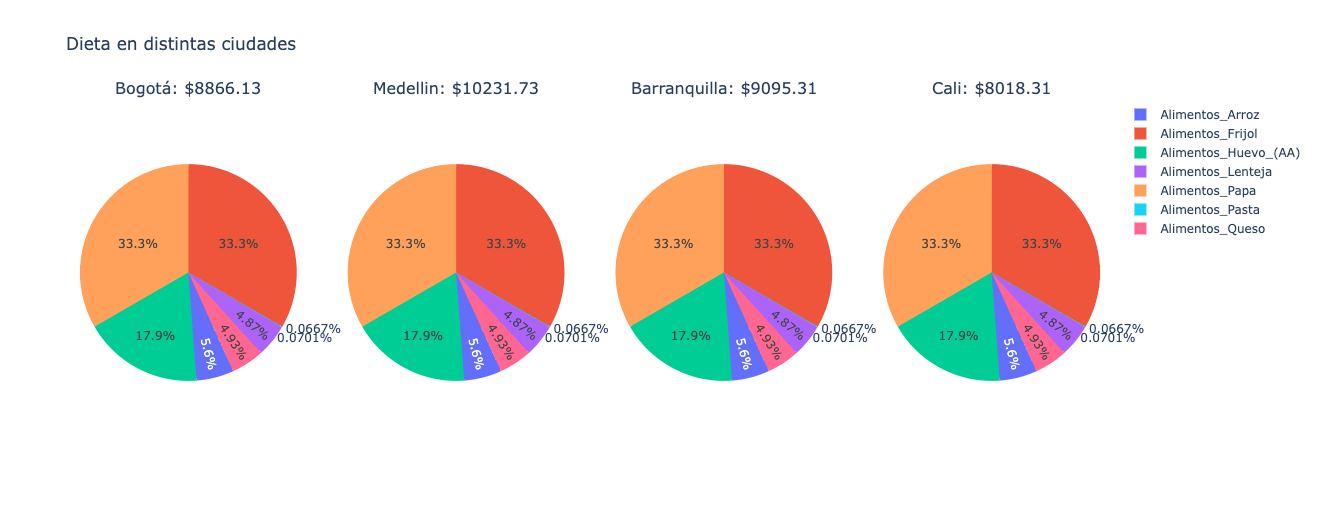

In [3]:
display(Image('2.png'))

Se observa que los limites superiores de hierro y vitamina B12 son causantes para que el problema se vuelva irresoluble. Esto se debe a que la dieta depende en gran medida del frijol, un tercio para ser precisos, lo que conlleva una dosis de hierro de alrededor de 34 mg. Esto empieza a marcar algunos problemas a la hora de poner esta dieta en práctica y a darnos una idea de por qué algo tan "simple" no se ha hecho antes.

Otra observación es que esta dieta no incluye carnes, ni siquiera cuando se incluyó el atún, una carne muy barata, y se consideró dos nutrientes especialmente presentes en carnes. 
Esto implica que la carne (y el pescado) no es necesaria para una dieta "suficiente" y puede ser considerada un agregado para aportar otros nutrientes.


#Introduciendo la programación cuadrática
Ahora, intentemos usar la librería cvxpy para resolver el problema cuadrático que habíamos planteado al inicio. Resolviendo primero una versión "dummy" del problema, podremos hacernos a una idea de que obtendríamos si usáramos solo los datos promedio, sin considerar nutrientes ni nada más allá de la cantidad de comida.


In [ ]:
#usando cvx
# Datos.

#Costos promedio
costprom = f["promedio"]

#nombres de los alimentos
alimentos = f["Alimento"]

#variable cvx
x = cp.Variable(costprom.size)

#transpuesta de costo promedio
trascost = costprom.to_frame().T.to_numpy()

trascost

array([[ 1.858625 ,  2.962    ,  7.75665  ,  2.5610625,  7.113425 ,
        35.0432   , 18.785    , 12.8043   ,  2.81175  ,  5.6593125,
         4.6943   ,  6.243    , 16.5915   ,  1.335875 , 25.3445   ]])

In [ ]:
# Construyendo el problema.

objective = cp.Minimize(trascost @ x)
constraints = [0 <= x, x <= 500, sum(x) == 1500]
prob = cp.Problem(objective, constraints)


result = prob.solve()
print(f"El costo total de la dieta es de ${result}")

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.Series(x.value).set_axis(alimentos)

El costo total de la dieta es de $2877.7812510307244


Alimento
Cebolla Cabezona   500.00000
Tomate               0.00000
Frijol               0.00000
Arroz              500.00000
Huevo (AA)           0.00000
Lomo (Res)           0.00000
Lomo (Cerdo)         0.00000
Pechuga (Pollo)      0.00000
Papa                 0.00000
Lenteja              0.00000
Arveja               0.00000
Pasta                0.00000
Queso                0.00000
Zanahoria          500.00000
Atún                 0.00000
dtype: float64

Esta primera versión tiende a la cebolla cabezona, arroz y zanahoria, alimentos con costos promedios bajos, para una dieta con el bajísimo costo de \$2877. Agreguemos todas las otras restricciones.

In [ ]:
#Cargamos los datos sobre los alimentos

calorias = f['kcal/g'].to_frame().T.to_numpy()
carbohidratos=f['carb/g'].to_frame().T.to_numpy()
proteina=f['proteina/g'].to_frame().T.to_numpy()
grasa=f['grasa/g'].to_frame().T.to_numpy()
calcio=f['calcio/g'].to_frame().T.to_numpy()
hierro=f['mghierro/g'].to_frame().T.to_numpy()
B12=f['B12/g'].to_frame().T.to_numpy()

Definamos nuestras constraints y creemos el problema para poder resolverlo usando cvxpy

In [ ]:
constraints = [0 <= x, x <= 500, sum(x) <= 1500,
               calorias @ x >= 1750.0, calorias @ x <= 2250.0,
               proteina @ x >= 50, proteina @ x <= 98.41,
               carbohidratos @ x >= 275,carbohidratos @ x <= 325,
               grasa @ x >= 66, grasa @ x <= 78,
               calcio @ x >= 1.3, calcio @ x <= 2.5,
               hierro @ x >= 12, B12 @ x >= (2.45/1000000),
               trascost @ x <= 10393]

In [ ]:
#Creamos el problema de optimización
objective = cp.Minimize(trascost @ x)

prob = cp.Problem(objective, constraints)

result = prob.solve()
print(f"El costo total de la dieta es de ${result}")

diet = pd.Series(x.value).set_axis(alimentos)
diet


El costo total de la dieta es de $9038.444175043356


Alimento
Cebolla Cabezona    -0.00000
Tomate              -0.00000
Frijol             500.00000
Arroz               84.72321
Huevo (AA)         269.25358
Lomo (Res)          -0.00000
Lomo (Cerdo)        -0.00000
Pechuga (Pollo)     -0.00000
Papa               500.00000
Lenteja             73.25126
Arveja               0.00000
Pasta                0.00000
Queso               72.77195
Zanahoria           -0.00000
Atún                -0.00000
dtype: float64

In [ ]:
def graficarDieta(dieta):
  fig = px.pie(values=dieta, names=alimentos, title='Dieta con costos promedio')
  fig.show(renderer="colab")

In [ ]:
graficarDieta(diet)

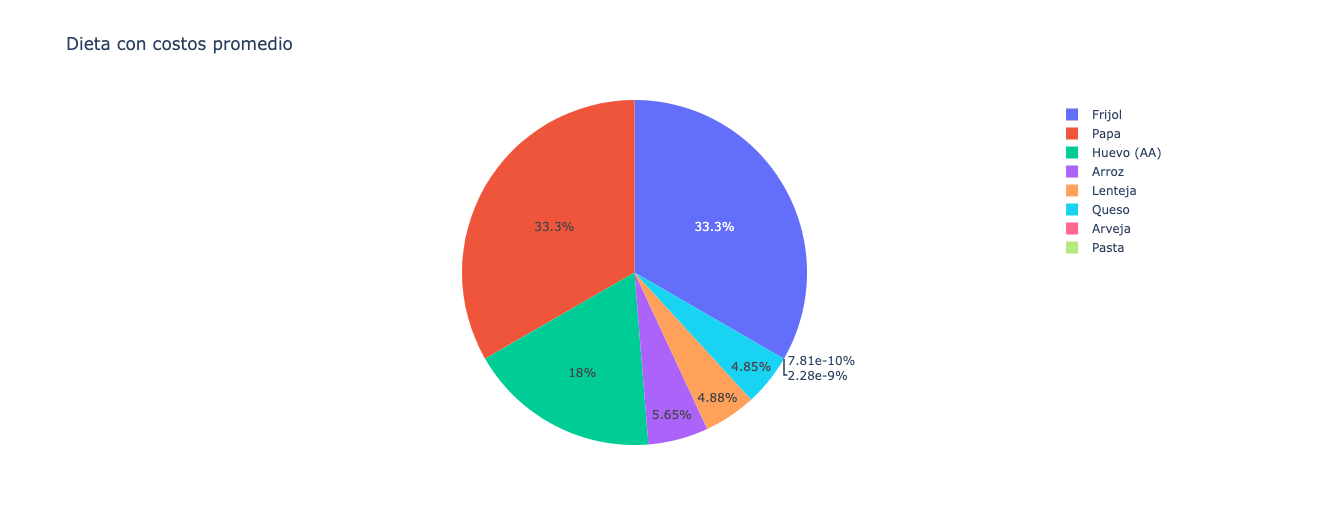

In [4]:
display(Image('3.png'))

Aun tomando solo promedios, se observa que la dieta tiende al frijol y la papa, con un costo similar a los que habíamos calculado antes en \$9038. Finalmente, intentemos resolver el problema cuadrático.

Como primera medida, debemos cargar los datos para la varianza.

In [ ]:
varia = f["varianza"]
trasvaria = varia.to_frame().to_numpy()
diagvaria = np.diagflat(trasvaria)

Entre los cambios que hubo que hacer, fue transformar el vector de varianzas en una matriz cuadrada. En nuestra primera aproximación, decidimos simplemente convertir nuestro vector en una matriz y observar los resultados. Esto se debe a que consideramos que los precios de los alimentos serán independientes entre sí, relacionándose más con factores externos.

In [ ]:
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, diagvaria) + trascost @ x),constraints)
result =prob.solve()


print(f"El costo total de la dieta es de ${np.matmul(trascost,x.value)}")
print("Y la dieta esta constituida por")
dietQ = pd.Series(x.value).set_axis(alimentos)
dietQ

El costo total de la dieta es de $[9897.91331467]
Y la dieta esta constituida por


Alimento
Cebolla Cabezona     0.00000
Tomate               0.00000
Frijol             456.30174
Arroz                0.00000
Huevo (AA)         222.60859
Lomo (Res)           0.00000
Lomo (Cerdo)         0.00000
Pechuga (Pollo)      0.00000
Papa               500.00000
Lenteja             54.82073
Arveja               0.00000
Pasta              131.31303
Queso              134.95591
Zanahoria            0.00000
Atún                 0.00000
dtype: float64

In [ ]:
graficarDieta(dietQ)

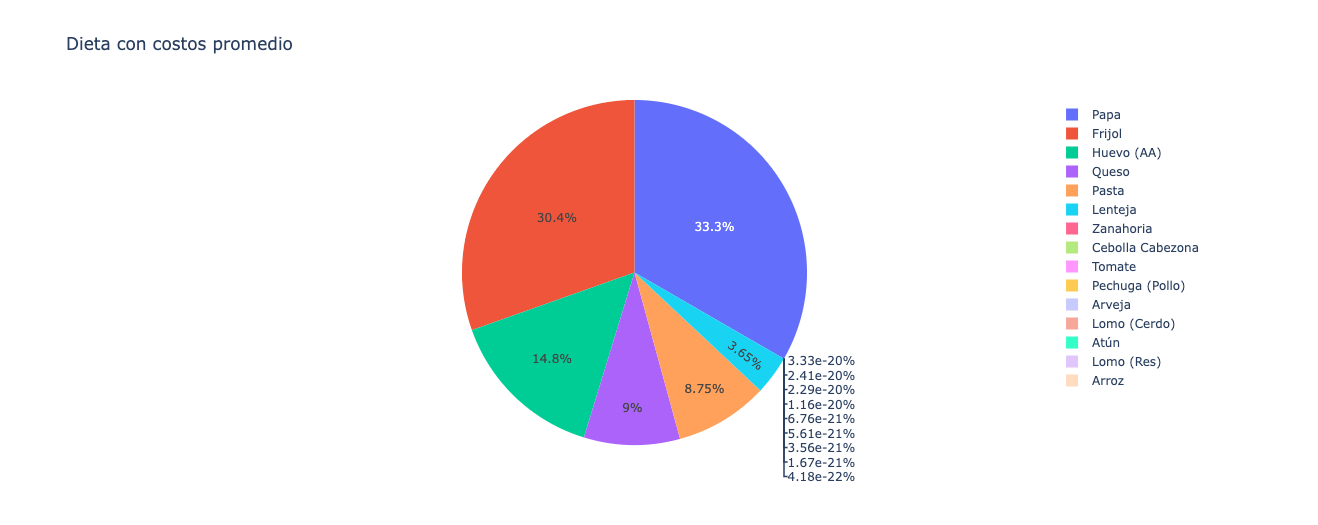

In [5]:
display(Image('4.png'))

In [ ]:
dietQ-diet

Alimento
Cebolla Cabezona     0.00000
Tomate               0.00000
Frijol             -43.69826
Arroz              -84.72321
Huevo (AA)         -46.64499
Lomo (Res)           0.00000
Lomo (Cerdo)         0.00000
Pechuga (Pollo)      0.00000
Papa                 0.00000
Lenteja            -18.43053
Arveja              -0.00000
Pasta              131.31303
Queso               62.18396
Zanahoria            0.00000
Atún                 0.00000
dtype: float64

Se ve que, ignorando las partes que tienen menos de una millonésima de porcentaje, esta dieta es ligeramente más diversa:  

*  El frijol dejó de ser el alimento más consumido, reduciéndose en casi casi 50g
*   La papa continúa siendo un tercio de la dieta
* También bajó el consumo de huevo y ligeramente el de lenteja
* Se introdujeron más de 100g de pasta
* casi se duplica la cantidad de queso 

En este ejercicio la aversión al riesgo estaba en la mitad (0.5), ¿Como cambiará la dieta si pasamos a un valor de 0.9 o 1? (Recordemos que un valor de 0 nos dará la dieta lineal que ya calculamos)


In [ ]:
prob = cp.Problem(cp.Minimize((1)*cp.quad_form(x, diagvaria) + trascost @ x),constraints)
result =prob.solve()

print(f"el costo total de la dieta es de ${np.matmul(trascost,x.value)}")
print("Y la dieta esta constituida por")
dietQ2 = pd.Series(x.value).set_axis(alimentos)
dietQ2

el costo total de la dieta es de $[9904.96545831]
Y la dieta esta constituida por


Alimento
Cebolla Cabezona    -0.00000
Tomate              -0.00000
Frijol             455.88590
Arroz                0.00000
Huevo (AA)         222.01107
Lomo (Res)          -0.00000
Lomo (Cerdo)        -0.00000
Pechuga (Pollo)     -0.00000
Papa               500.00000
Lenteja             54.76350
Arveja              -0.00000
Pasta              131.59430
Queso              135.74523
Zanahoria           -0.00000
Atún                -0.00000
dtype: float64

In [ ]:
graficarDieta(dietQ2)

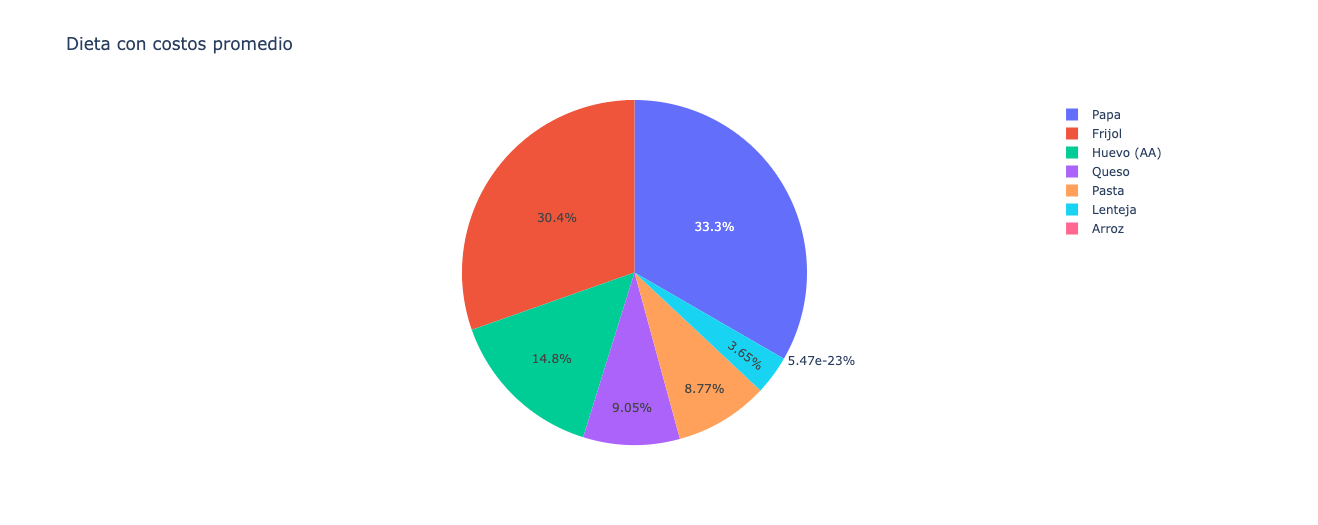

In [6]:
display(Image('5.png'))

In [ ]:
dietQ2-dietQ

Alimento
Cebolla Cabezona   -0.00000
Tomate             -0.00000
Frijol             -0.41585
Arroz              -0.00000
Huevo (AA)         -0.59752
Lomo (Res)         -0.00000
Lomo (Cerdo)       -0.00000
Pechuga (Pollo)    -0.00000
Papa                0.00000
Lenteja            -0.05723
Arveja             -0.00000
Pasta               0.28128
Queso               0.78932
Zanahoria          -0.00000
Atún               -0.00000
dtype: float64

Se observa que la variación fue despreciable.

Hagamos ahora el análisis de dualidad:

In [ ]:
for i in range(len(constraints)):
  print(f"El multiplicador de Lagrange de la restricción {i+1} es {prob.constraints[i].dual_value} \n \n")


El multiplicador de Lagrange de la restricción 1 es [2072.21612405 2685.93497564    0.          196.99886885    0.
 4179.21353066 4046.16198976 4222.24606313    0.            0.
 1902.88554852    0.            0.         2399.07486512 4445.51074308] 
 

El multiplicador de Lagrange de la restricción 2 es [  0.           0.           0.           0.           0.
   0.           0.           0.         137.48470485   0.
   0.           0.           0.           0.           0.        ] 
 

El multiplicador de Lagrange de la restricción 3 es 2964.121866058133 
 

El multiplicador de Lagrange de la restricción 4 es [0.] 
 

El multiplicador de Lagrange de la restricción 5 es [0.] 
 

El multiplicador de Lagrange de la restricción 6 es [0.] 
 

El multiplicador de Lagrange de la restricción 7 es [15894.02398137] 
 

El multiplicador de Lagrange de la restricción 8 es [10773.59846128] 
 

El multiplicador de Lagrange de la restricción 9 es [0.] 
 

El multiplicador de Lagrange de la restricc

La estructura de este análisis de dualidad nos permite ver:


*   En la primera, el mínimo de 0g para los alimentos, nos da un array de 15 posiciones, la misma que nuestra cantidad de alimentos. Esta nos dice que exigir mínimos de alimentos como cebolla, tomate o arroz (que fueron los que no se usaron), puede tener consecuencias altas para nuestro resultado.
*   La segunda, el máximo de 500g por alimento, es también un array de 15 posiciones, nos dice que el alimento en la novena posición es muy importante, y reducir la cantidad permitida de este puede salir caro. ¿Cuál es el alimento en la novena posición? La papa.
* La cuarta, quinta, sexta, novena, decimo primera, décimo segunda, décimo tercera, décimo cuarta, décimo quinta y décimo sexta son todas cero. Estas restricciones corresponden a
  * cuarta y quinta: cantidades máximas y mínimas calorías
  * sexta: cantidad mínima de proteína 
  * novena: cantidad máxima de carbohidratos
  * decimo primera: cantidad máxima de grasa
  * décimo segunda y décimo tercera: cantidades máximas y mínimas de calcio
  * décimo cuarta y décimo quinta: cantidades mínimas de hierro y vitamina B12
  * décimo sexta: presupuesto máximo 

  Estas restricciones no influyen mucho en el valor final de nuestra función objetivo

* Por otro lado, restricciones que sí importan, y mucho, al valor de nuestra función de costo son:
  * Tercera: La cantidad total máxima de alimento que se puede consumir
  * Séptima: Cantidad máxima de proteína
  * Octava: Cantidad mínima de carbohidratos
  * Decima: Cantidad mínima de grasa

  Estas restricciones tienen gran peso en nuestra función objetivo.

Ahora, calculemos la covarianza de otras dos formas para poder ver los cambios al tener aproximaciones más rigurosas.

Primero, obtengamos los costos de cada alimento.

In [ ]:

costos = f[["CostoBogota/g","CostoMedellin/g","CostoBarranquilla/g","CostoCali/g"]]
costos

,CostoBogota/g,CostoMedellin/g,CostoBarranquilla/g,CostoCali/g
0,1.70000,1.91550,2.05550,1.76350
1,2.74500,3.10250,2.74800,3.25150
2,8.13730,9.51550,7.26750,6.10630
3,2.61025,2.44500,2.69300,2.49600
4,6.65380,6.53080,8.46150,6.80760
5,33.75100,48.00000,28.45800,29.68880
6,18.98100,21.35000,14.05800,20.75100
7,12.36700,13.75000,12.85000,12.25000
8,2.64600,3.62500,2.32500,2.65100
9,6.05375,5.52750,5.52700,5.52900


Ahora los costos promedio

In [ ]:
costoprom = f["promedio"]
costoprom

0     1.85862
1     2.96200
2     7.75665
3     2.56106
4     7.11343
5    35.04320
6    18.78500
7    12.80430
8     2.81175
9     5.65931
10    4.69430
11    6.24300
12   16.59150
13    1.33587
14   25.34450
Name: promedio, dtype: float64

Restemos a cada fila de la matriz de costos su elemento correspondiente en el vector de costos promedios, y luego lo convertimos a un nparray para poder realizar los cálculos más fácilmente.

In [ ]:
cmincimpro = costos.subtract(costoprom, axis = 0)
numcmcp = cmincimpro.to_numpy()

calculemos la covarianza: Primero multiplicamos la matriz por su transpuesta, y luego la dividimos entre la cantidad de observaciones (columnas, en este caso 4) menos 1.

In [ ]:
len(costos.columns)

4

In [ ]:
covar1 = np.matmul(numcmcp,numcmcp.T)/(len(costos.columns)-1)
covar1

array([[ 2.54017292e-02, -9.08579167e-03,  3.34473750e-02,
         5.92028125e-03,  1.11421696e-01,  5.15897583e-02,
        -3.34283333e-01,  6.16261250e-02, -2.66395833e-03,
        -2.79058437e-02,  2.04715792e-01, -3.97611667e-02,
         3.26208083e-01, -2.85947917e-03,  1.00824583e-01],
       [-9.08579167e-03,  6.54785000e-02, -6.95269500e-02,
        -2.46835625e-02, -1.19714858e-01,  6.53323933e-01,
         6.32861833e-01,  1.91717667e-02,  6.92855833e-02,
        -3.78410625e-02, -3.08693900e-01,  7.44736667e-02,
         3.81196667e-02, -1.46116458e-01, -4.25248333e-02],
       [ 3.34473750e-02, -6.95269500e-02,  2.06712353e+00,
        -4.75248792e-02, -4.51466278e-01,  1.14516588e+01,
         1.21789387e+00,  7.96440350e-01,  6.23559850e-01,
         6.60287042e-02, -7.75401917e-01, -1.92934067e-01,
         6.32138333e-02,  1.29823250e-02,  1.89760167e-01],
       [ 5.92028125e-03, -2.46835625e-02, -4.75248792e-02,
         1.25101823e-02,  8.09241646e-02, -6.95940954

Podemos convertirlo a dataframe para que sea más fácilmente legible.

In [ ]:
pd.DataFrame(covar1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.02540,-0.00909,0.03345,0.00592,0.11142,0.05159,-0.33428,0.06163,-0.00266,-0.02791,0.20472,-0.03976,0.32621,-0.00286,0.10082
1,-0.00909,0.06548,-0.06953,-0.02468,-0.11971,0.65332,0.63286,0.01917,0.06929,-0.03784,-0.30869,0.07447,0.03812,-0.14612,-0.04252
2,0.03345,-0.06953,2.06712,-0.04752,-0.45147,11.45166,1.21789,0.79644,0.62356,0.06603,-0.77540,-0.19293,0.06321,0.01298,0.18976
3,0.00592,-0.02468,-0.04752,0.01251,0.08092,-0.69594,-0.34655,-0.02973,-0.05210,0.00857,0.18195,-0.02783,0.02852,0.05731,0.02387
4,0.11142,-0.11971,-0.45147,0.08092,0.82051,-4.73162,-2.85271,-0.03962,-0.33488,-0.08100,1.63098,-0.22279,1.30833,0.21701,0.43314
5,0.05159,0.65332,11.45166,-0.69594,-4.73162,80.52764,17.86080,5.16178,4.93912,-0.21617,-9.82208,0.05258,0.97375,-2.32161,0.44598
6,-0.33428,0.63286,1.21789,-0.34655,-2.85271,17.86080,10.94244,0.34474,1.34611,0.03615,-6.00361,0.92837,-3.25758,-1.30529,-1.32489
7,0.06163,0.01917,0.79644,-0.02973,-0.03962,5.16178,0.34474,0.46497,0.30281,-0.07699,-0.14229,-0.08901,0.80859,-0.15004,0.25984
8,-0.00266,0.06929,0.62356,-0.05210,-0.33488,4.93912,1.34611,0.30281,0.31720,-0.02907,-0.72254,0.04060,0.05759,-0.20310,0.00021
9,-0.02791,-0.03784,0.06603,0.00857,-0.08100,-0.21617,0.03615,-0.07699,-0.02907,0.06915,-0.08146,-0.00514,-0.48396,0.11267,-0.10428


Si lo calculamos directamente con numpy para verificar nuestro resultado, veremos que son iguales.

In [ ]:
covar2 = np.cov(costos.to_numpy())
pd.DataFrame(covar2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.02540,-0.00909,0.03345,0.00592,0.11142,0.05159,-0.33428,0.06163,-0.00266,-0.02791,0.20472,-0.03976,0.32621,-0.00286,0.10082
1,-0.00909,0.06548,-0.06953,-0.02468,-0.11971,0.65330,0.63286,0.01917,0.06929,-0.03784,-0.30869,0.07447,0.03812,-0.14612,-0.04252
2,0.03345,-0.06953,2.06712,-0.04752,-0.45147,11.45166,1.21789,0.79644,0.62356,0.06603,-0.77540,-0.19293,0.06321,0.01298,0.18976
3,0.00592,-0.02468,-0.04752,0.01251,0.08092,-0.69594,-0.34655,-0.02973,-0.05210,0.00857,0.18195,-0.02783,0.02852,0.05731,0.02387
4,0.11142,-0.11971,-0.45147,0.08092,0.82051,-4.73162,-2.85271,-0.03962,-0.33488,-0.08100,1.63098,-0.22279,1.30833,0.21701,0.43314
5,0.05159,0.65330,11.45166,-0.69594,-4.73162,80.52133,17.86080,5.16177,4.93912,-0.21617,-9.82209,0.05258,0.97375,-2.32161,0.44598
6,-0.33428,0.63286,1.21789,-0.34655,-2.85271,17.86080,10.94244,0.34474,1.34611,0.03615,-6.00361,0.92837,-3.25758,-1.30529,-1.32489
7,0.06163,0.01917,0.79644,-0.02973,-0.03962,5.16177,0.34474,0.46497,0.30281,-0.07699,-0.14229,-0.08901,0.80859,-0.15004,0.25984
8,-0.00266,0.06929,0.62356,-0.05210,-0.33488,4.93912,1.34611,0.30281,0.31720,-0.02907,-0.72254,0.04060,0.05759,-0.20310,0.00021
9,-0.02791,-0.03784,0.06603,0.00857,-0.08100,-0.21617,0.03615,-0.07699,-0.02907,0.06915,-0.08146,-0.00514,-0.48396,0.11267,-0.10428


Ahora que tenemos una matriz de covarianza más precisa, podemos recalcular nuestra dieta:

In [ ]:
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, covar1) + trascost @ x),constraints)
result =prob.solve()


print(f"El costo total de la dieta es de ${np.matmul(trascost,x.value)}")

print("Y la dieta esta constituida por")
dietQcovar = pd.Series(x.value).set_axis(alimentos)
dietQcovar

El costo total de la dieta es de $[10393.]
Y la dieta esta constituida por


Alimento
Cebolla Cabezona     0.00000
Tomate               0.00000
Frijol             500.00000
Arroz                0.00000
Huevo (AA)         257.72680
Lomo (Res)           0.00000
Lomo (Cerdo)         0.00000
Pechuga (Pollo)      0.00000
Papa               332.63388
Lenteja             13.96782
Arveja               0.00000
Pasta              280.01745
Queso              115.65405
Zanahoria            0.00000
Atún                 0.00000
dtype: float64

In [ ]:
graficarDieta(dietQcovar)

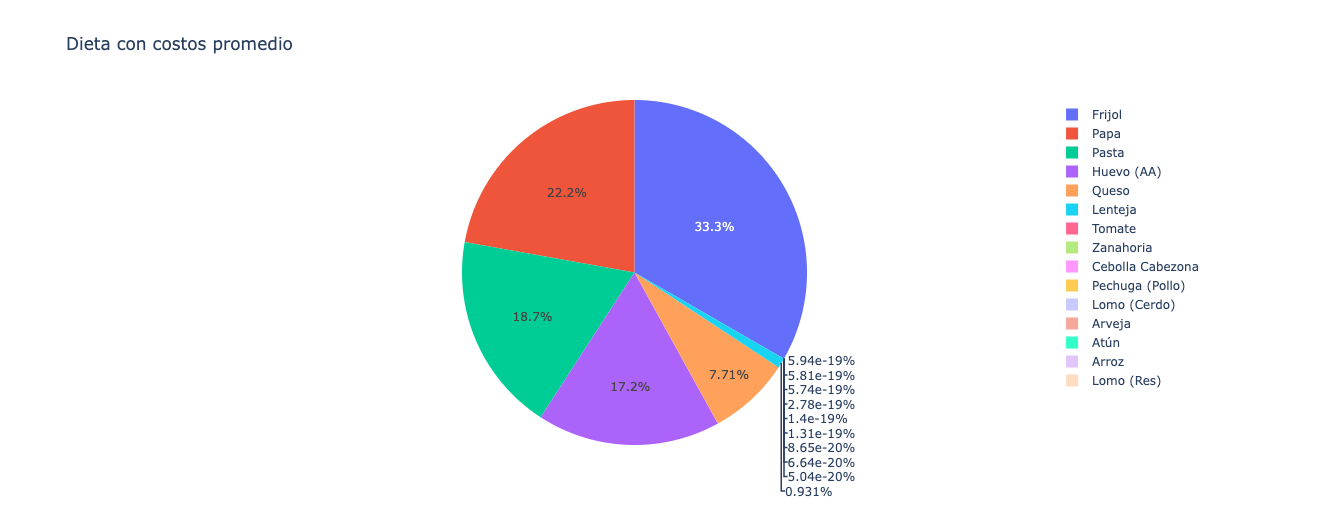

In [7]:
display(Image('6.png'))

Podemos observar un gran cambio con respecto a la dieta que habíamos calculado antes. En este caso, esta es mucho más diversa, lo que la hace más resistente a que uno u otro alimento cambie de valor, al no depender tanto de uno solo, además del frijol.

Veamos las diferencias más a detalle:

In [ ]:
dietQcovar - dietQ

Alimento
Cebolla Cabezona      0.00000
Tomate                0.00000
Frijol               43.69826
Arroz                 0.00000
Huevo (AA)           35.11821
Lomo (Res)            0.00000
Lomo (Cerdo)          0.00000
Pechuga (Pollo)       0.00000
Papa               -167.36612
Lenteja             -40.85291
Arveja                0.00000
Pasta               148.70443
Queso               -19.30186
Zanahoria             0.00000
Atún                  0.00000
dtype: float64

Podemos observar que se redujo la cantidad de papa, lenteja y queso, y se aumentó la cantidad de frijol, huevo y, principalmente, pasta.

¿Qué ocurre al aumentar el factor de aversión al riesgo?

In [ ]:
prob = cp.Problem(cp.Minimize(0.9*cp.quad_form(x, covar1) + trascost @ x),constraints)
result =prob.solve()


print(f"El costo total de la dieta es de ${np.matmul(trascost,x.value)}")
print("Y la dieta esta constituida por")
dietQcovar2 = pd.Series(x.value).set_axis(alimentos)
dietQcovar2

El costo total de la dieta es de $[10393.]
Y la dieta esta constituida por


Alimento
Cebolla Cabezona     0.00000
Tomate               0.00000
Frijol             500.00000
Arroz                0.00000
Huevo (AA)         257.72680
Lomo (Res)          -0.00000
Lomo (Cerdo)         0.00000
Pechuga (Pollo)      0.00000
Papa               332.63388
Lenteja             13.96782
Arveja               0.00000
Pasta              280.01745
Queso              115.65405
Zanahoria            0.00000
Atún                 0.00000
dtype: float64

In [ ]:
graficarDieta(dietQcovar2)

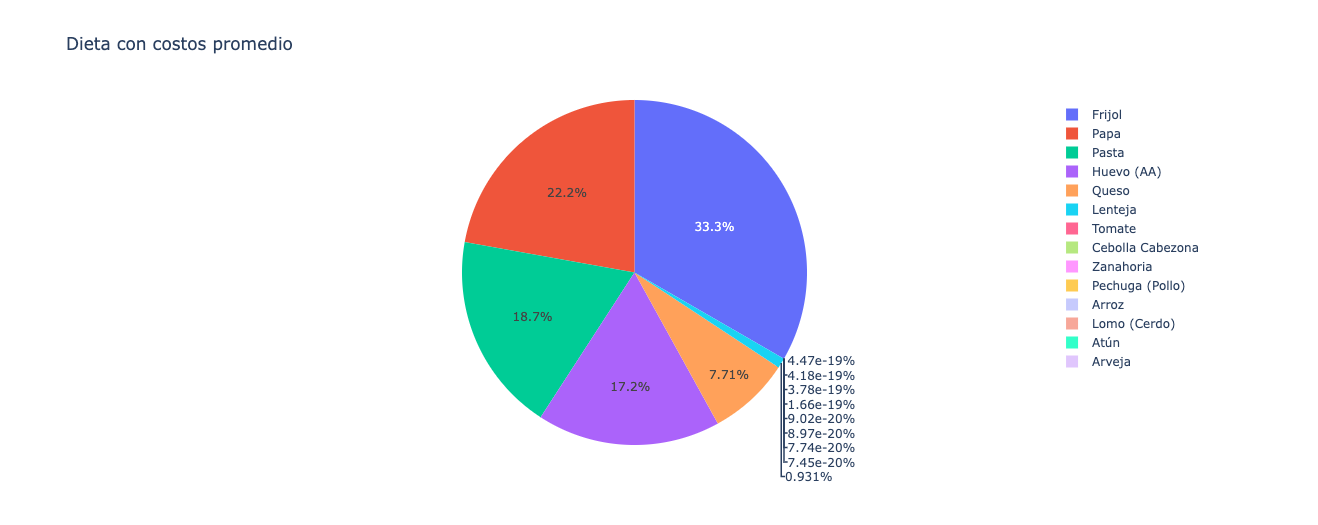

In [8]:
display(Image('7.png'))

In [ ]:
dietQcovar2 - dietQcovar

Alimento
Cebolla Cabezona   -0.00000
Tomate             -0.00000
Frijol              0.00000
Arroz               0.00000
Huevo (AA)          0.00000
Lomo (Res)         -0.00000
Lomo (Cerdo)       -0.00000
Pechuga (Pollo)    -0.00000
Papa                0.00000
Lenteja             0.00000
Arveja             -0.00000
Pasta              -0.00000
Queso              -0.00000
Zanahoria          -0.00000
Atún               -0.00000
dtype: float64

No hubo variación alguna.

¿Qué ocurre si elegimos un $\gamma > 1$?

In [ ]:
prob = cp.Problem(cp.Minimize((20)*cp.quad_form(x, covar2) + trascost @ x),constraints)
result =prob.solve()


print(f"El costo total de la dieta es de ${np.matmul(trascost,x.value)}")
print("Y la dieta esta constituida por")
dietQcovar3 = pd.Series(x.value).set_axis(alimentos)
dietQcovar3

El costo total de la dieta es de $[10393.]
Y la dieta esta constituida por


Alimento
Cebolla Cabezona    -0.00000
Tomate              -0.00000
Frijol             500.00000
Arroz               -0.00000
Huevo (AA)         257.72680
Lomo (Res)          -0.00000
Lomo (Cerdo)        -0.00000
Pechuga (Pollo)     -0.00000
Papa               332.63388
Lenteja             13.96782
Arveja              -0.00000
Pasta              280.01745
Queso              115.65405
Zanahoria           -0.00000
Atún                -0.00000
dtype: float64

In [ ]:
dietQcovar3 - dietQcovar

Alimento
Cebolla Cabezona   -0.00000
Tomate             -0.00000
Frijol              0.00000
Arroz              -0.00000
Huevo (AA)          0.00000
Lomo (Res)         -0.00000
Lomo (Cerdo)       -0.00000
Pechuga (Pollo)    -0.00000
Papa               -0.00000
Lenteja            -0.00000
Arveja             -0.00000
Pasta               0.00000
Queso              -0.00000
Zanahoria          -0.00000
Atún               -0.00000
dtype: float64

Incluso con un factor de aversión al riesgo tan alto, no se observa cambio. Esto puede significar que nuestra dieta se encuentra ya en un minimo global.

Hagamos ahora el análisis de dualidad:


In [ ]:
for i in range(len(constraints)):
  print(f"El multiplicador de Lagrange de la restricción {i+1} es {prob.constraints[i].dual_value} \n \n")


El multiplicador de Lagrange de la restricción 1 es [109064.45027773 137215.44556886      0.          12690.30261041
      0.         491450.34238756 227809.29977772 244867.5106771
      0.              0.          91519.8394661       0.
      0.         118849.13987291 256636.66394152] 
 

El multiplicador de Lagrange de la restricción 2 es [    0.             0.         33133.17523049     0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.        ] 
 

El multiplicador de Lagrange de la restricción 3 es 148986.22163830142 
 

El multiplicador de Lagrange de la restricción 4 es [0.] 
 

El multiplicador de Lagrange de la restricción 5 es [0.] 
 

El multiplicador de Lagrange de la restricción 6 es [0.] 
 

El multiplicador de Lagrange de la restricción 7 es [757742.79024265] 
 

El multiplicador de Lagrange de la restricción 8 es [534628.0335869] 
 

El multiplicador de Lagrange de la restri

Al hacer el análisis, podemos observar que:


*   Para la primera y segunda restricción, se sigue teniendo que imponer un mínimo para los alimentos va a afectar mucho el valor de la función objetivo.
*   El cambio viene en la segunda, que pasó de tener un gran valor para el noveno alimento (papa) a tenerlo para el tercero (frijol)
* La tercera, séptima, octava y novena restricción siguen teniendo valores no nulos, lo que nos indica que siguen siendo importantes, y más en este caso, en el que todos sus valores aumentaron.
* La cuarta, quinta, sexta, novena, decimo primera, décimo segunda, décimo tercera, décimo cuarta y décimo quinta siguen siendo todas cero, o sea que siguen sin considerarse tan importantes.
* Finalmente, un cambio fue la décimo sexta restricción, el presupuesto máximo, en el que se tiene un valor pequeño, en comparación con el de otras restricciones, pero que dejó de ser nulo.



Y así, nuestra dieta matemáticamente óptima consiste en:

*   500g de frijol 
*   258g de huevo
*   332g de papa
*   14g de lenteja
*   280g de pasta
*   116 de queso

por día.

Veamos el costo de nuestra dieta en cada ciudad:

In [ ]:
costosBogota = f["CostoBogota/g"].to_numpy().T
costosBarranquilla = f["CostoBarranquilla/g"].to_numpy().T
costosCali = f["CostoCali/g"].to_numpy().T
costosMedellin = f["CostoMedellin/g"].to_numpy().T

In [ ]:
costoDietaBogota = np.matmul(costosBogota,dietQcovar)
costoDietaBogota

10087.877400694875

In [ ]:
costoDietaBarranquilla = np.matmul(costosBarranquilla,dietQcovar)
costoDietaBarranquilla

10480.283443448183

In [ ]:
costoDietaCali = np.matmul(costosCali,dietQcovar)
costoDietaCali

9509.452556129336

In [ ]:
costoDietaMedellin = np.matmul(costosMedellin,dietQcovar)
costoDietaMedellin

11494.386599727608

In [ ]:
costos = [costoDietaBogota,costoDietaBarranquilla,costoDietaCali,costoDietaMedellin]
difCosto = max(costos) - min(costos)
difCosto

1984.9340435982722

Se observa que la dieta tiene una diferencia máxima de \$ 1985 pesos. Una diferencia no tan baja como se esperaba, pero igualmente una reducción del precio sobre la diferencia inicial de más de \$ 2600. El factor clave del frijol, un alimento muy importante pero muy variable, probablemente tuvo una gran influencia en este resultado.

Para la dieta que tenía una matriz diagonal para las covarianzas, tenemos:

In [ ]:
costoDietaBogota = np.matmul(costosBogota,dietQ)
costoDietaBogota

9532.094727179276

In [ ]:
costoDietaBarranquilla = np.matmul(costosBarranquilla,dietQ)
costoDietaBarranquilla

9977.023253433137

In [ ]:
costoDietaCali = np.matmul(costosCali,dietQ)
costoDietaCali

8989.298000525843

In [ ]:
costoDietaMedellin = np.matmul(costosMedellin,dietQ)
costoDietaMedellin

11093.23727754671

In [ ]:
costos = [costoDietaBogota,costoDietaBarranquilla,costoDietaCali,costoDietaMedellin]
difCosto = max(costos) - min(costos)
difCosto

2103.939277020867

Para esta dieta, la diferencia es \$2103, \$119 por encima de nuestra otra dieta.

# Conclusiones

A lo largo del desarrollo, pudimos observar como el frijol y la papa fueron los alimentos que más se utilizaron gracias a sus altos contenidos nutricionales a bajo costo. Por otro lado, en ninguna de las dietas se usaron carnes, probablemente debido a sus altos costos. Ni cuando se consideró hierro y vitamina B12 con miras a tener un sesgo que beneficiara a la carne, ni cuando se agregó atún, una carne nutritiva y considerablemente más barata que res, cerdo o pollo.

También vimos que algunas restricciones, como los máximos de hierro y vitamina B12, pueden hacer el problema irresoluble. Esto indica que la dieta puede no tener sostenibilidad a largo plazo, o que depende mucho de alimentos altos en hierro (frijol)
